In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier

sys.path.append("../../")

from helpers.split import make_train_test_split, tag_label_feature_split

DATASET_FOLDER = "../../datasets/"

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [57]:
# Lets start with our all features dataset
df = pd.read_pickle(DATASET_FOLDER + "dataset_01_mean.pickle")

In [58]:
# And get our labels, a label encoder and features
_, (y, le), X = tag_label_feature_split(df, label_format="encoded")

In [59]:
print(f"{X.shape= } {y.shape= }")

X.shape= (21351, 13) y.shape= (21351,)


In [60]:
# Use our helper function to handle the train, test split with scaling
X_train_std, X_test_std, y_train, y_test = make_train_test_split(
    X, y, test_size=0.2, random_state=10, stratify=y, x_scaler="standard", 
)

In [61]:
# Use PCA (and capture 95% of the underling variance)
pca = PCA(n_components=0.95, random_state=10)
X_train_std = pca.fit_transform(X_train_std)
X_test_std = pca.transform(X_test_std)

In [62]:
print(f"{X_train_std.shape= } {X_test_std.shape= }")

X_train_std.shape= (17080, 11) X_test_std.shape= (4271, 11)


In [77]:
# Use SMOTEENN to resample the training data

smt = SMOTETomek (random_state=10, n_jobs=-1, sampling_strategy='all')
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_std, y_train)

In [78]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4262]
 [   1 4127]
 [   2 4270]
 [   3 4273]
 [   4 4250]
 [   5 4257]
 [   6 4271]
 [   7 4038]
 [   8 4265]
 [   9 4135]]


(array([ 374., 4221.,  327.,  289., 1701., 1241.,  665., 4274.,  788.,
        3200.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

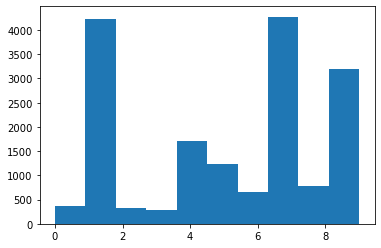

In [79]:
plt.hist(y_train)

(array([4262., 4127., 4270., 4273., 4250., 4257., 4271., 4038., 4265.,
        4135.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

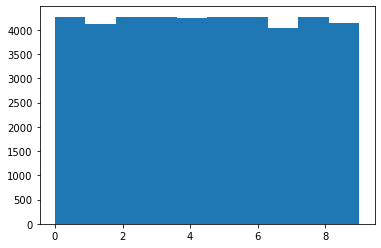

In [80]:
plt.hist(y_train_resampled)

In [81]:
model = model = SVC()

history = model.fit(X_train_resampled, y_train_resampled)

In [82]:
train_accuracy = model.score(X_train_resampled, y_train_resampled)
test_accuracy = model.score(X_test_std, y_test)

In [83]:
train_accuracy

0.5992455158014616

In [84]:
test_accuracy

0.42893935846405995